In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

In [2]:
df = pd.read_csv("ai_job_market_insights.csv")
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,"$111,392",Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,"$93,793",No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,"$107,170",Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,"$93,028",No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,"$87,753",Yes,Decline


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Job_Title              500 non-null    object
 1   Industry               500 non-null    object
 2   Company_Size           500 non-null    object
 3   Location               500 non-null    object
 4   AI_Adoption_Level      500 non-null    object
 5   Automation_Risk        500 non-null    object
 6   Required_Skills        500 non-null    object
 7   Salary_USD             500 non-null    object
 8   Remote_Friendly        500 non-null    object
 9   Job_Growth_Projection  500 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [4]:
df.dtypes

Job_Title                object
Industry                 object
Company_Size             object
Location                 object
AI_Adoption_Level        object
Automation_Risk          object
Required_Skills          object
Salary_USD               object
Remote_Friendly          object
Job_Growth_Projection    object
dtype: object

In [5]:
df['Salary_USD'] = df['Salary_USD'].str.replace('$', '').str.replace(',', '')

In [6]:
df["Salary_USD"]= df["Salary_USD"].astype("int64")
df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93793,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93028,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87753,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119795,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79645,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642,Yes,Stable


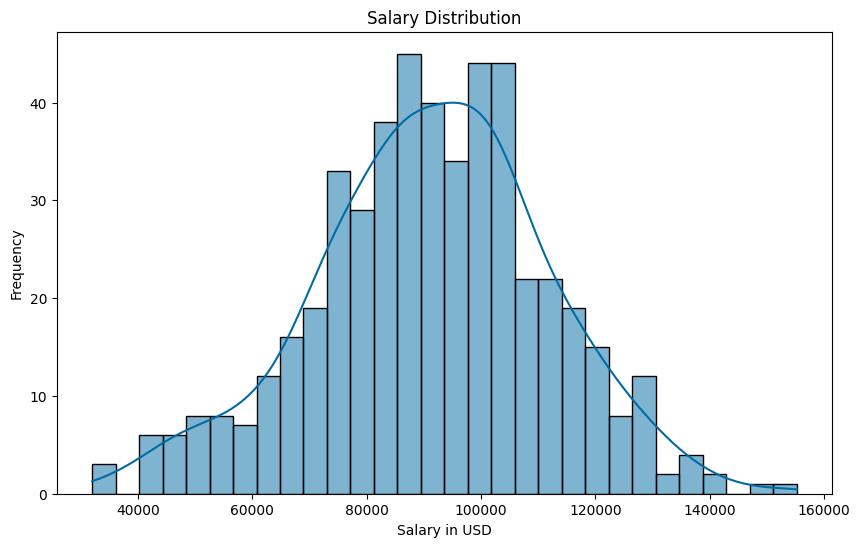

In [7]:
# Salary Distribution in Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary_USD'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


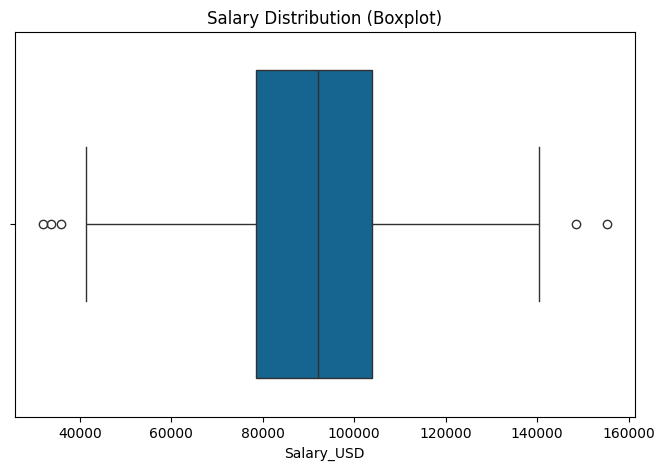

In [8]:
# Salary Distribution in box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Salary_USD'])
plt.title('Salary Distribution (Boxplot)')
plt.show()


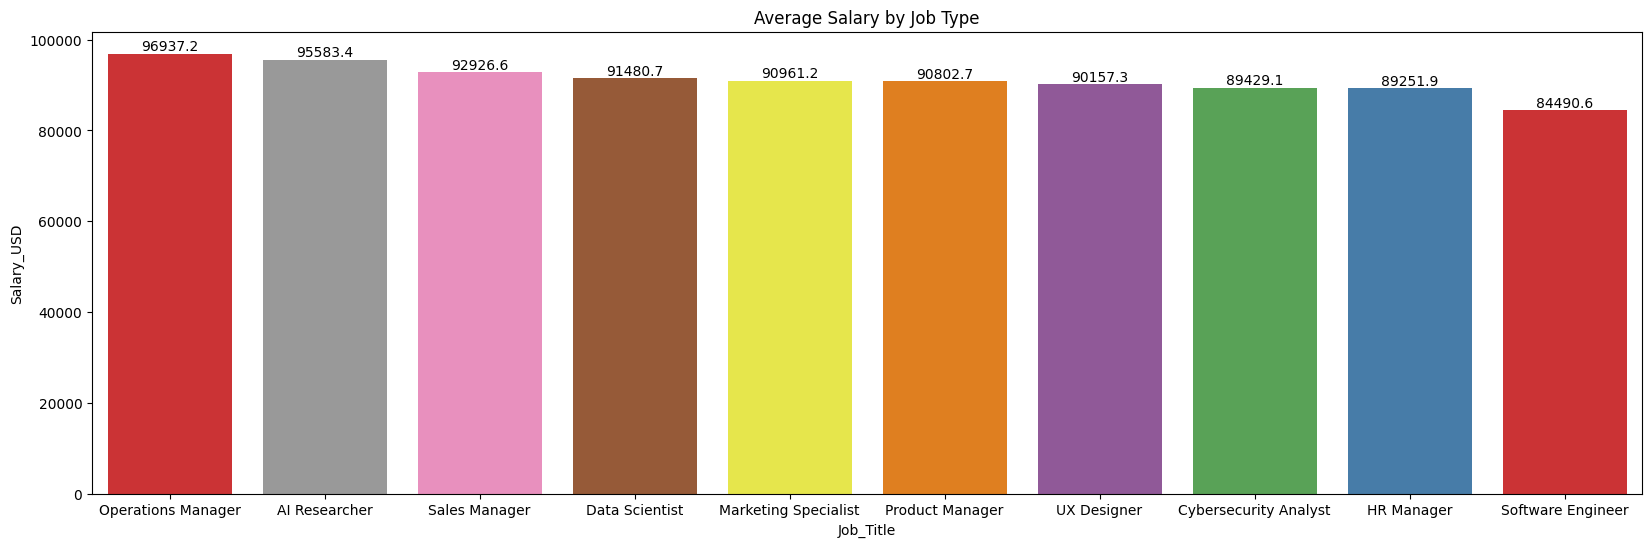

In [9]:
mean_salary_by_job = df.groupby('Job_Title')['Salary_USD'].mean().reset_index()
mean_salary_by_job = mean_salary_by_job.sort_values(by='Salary_USD', ascending=False)
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='Job_Title', y='Salary_USD', data=mean_salary_by_job, hue='Salary_USD',palette='Set1',legend=False,)
plt.title('Average Salary by Job Type')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


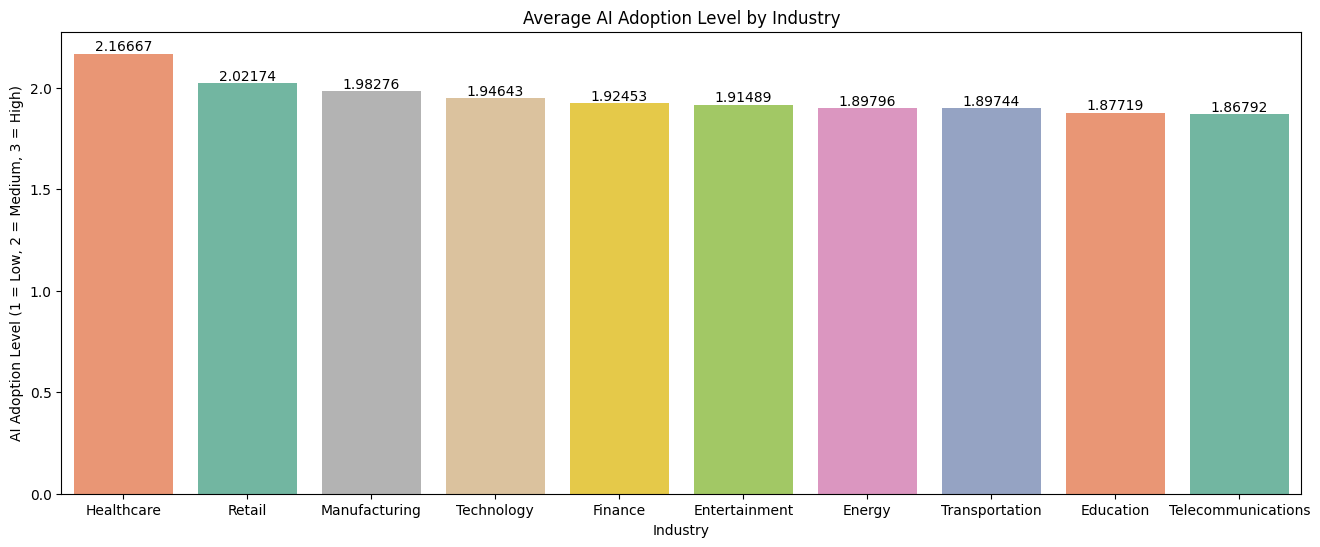

In [10]:


ai_adoption_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['AI Adoption Level Numeric'] = df['AI_Adoption_Level'].map(ai_adoption_mapping)

avg_ai_adoption_by_industry = df.groupby('Industry')['AI Adoption Level Numeric'].mean().reset_index()
avg_ai_adoption_by_industry = avg_ai_adoption_by_industry.sort_values(by='AI Adoption Level Numeric', ascending=False)
avg_ai_adoption_by_industry['Average AI Adoption Level'] = avg_ai_adoption_by_industry['AI Adoption Level Numeric'].map({1: 'Low', 2: 'Medium', 3: 'High'})


plt.figure(figsize=(16, 6))
ax = sns.barplot(x='Industry', y='AI Adoption Level Numeric', data=avg_ai_adoption_by_industry, hue='AI Adoption Level Numeric', palette='Set2',legend=False)
plt.title('Average AI Adoption Level by Industry')
plt.ylabel('AI Adoption Level (1 = Low, 2 = Medium, 3 = High)')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()



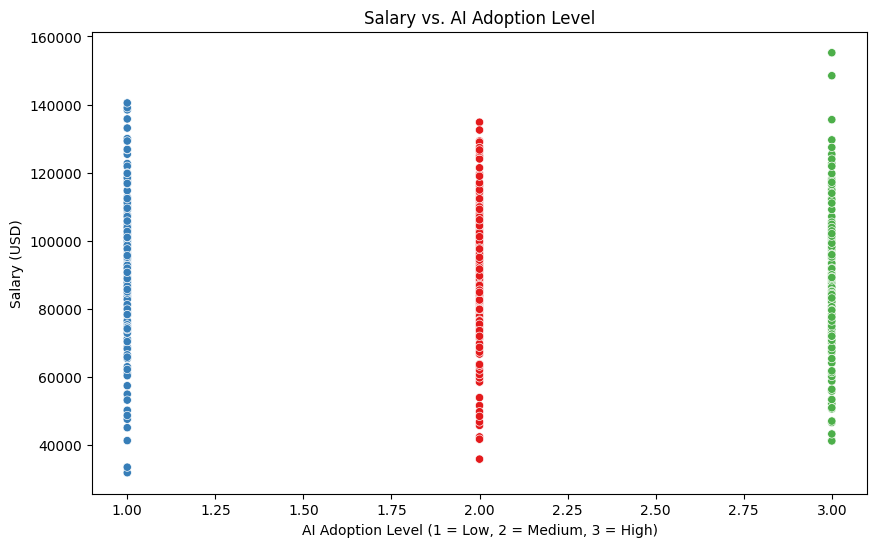

In [11]:

ai_adoption_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['AI Adoption Level Numeric'] = df['AI_Adoption_Level'].map(ai_adoption_mapping)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='AI Adoption Level Numeric', y='Salary_USD', data=df, hue='AI_Adoption_Level', palette='Set1',legend=False)
plt.title('Salary vs. AI Adoption Level')
plt.xlabel('AI Adoption Level (1 = Low, 2 = Medium, 3 = High)')
plt.ylabel('Salary (USD)')
plt.show()


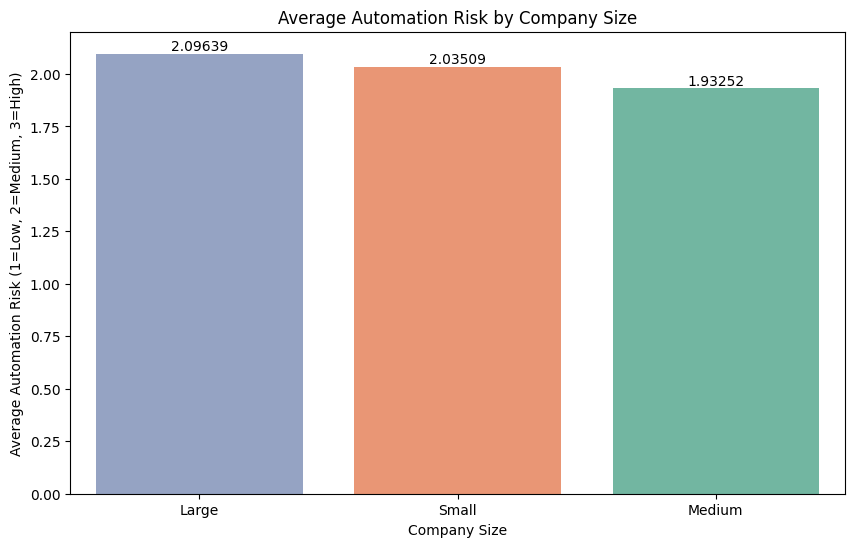

In [12]:

# Map Automation Risk to numeric values
risk_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Automation Risk Numeric'] = df['Automation_Risk'].map(risk_mapping)

# Group by Company Size and calculate mean Automation Risk
avg_risk_by_size = df.groupby('Company_Size')['Automation Risk Numeric'].mean().reset_index()
avg_risk_by_size = avg_risk_by_size.sort_values(by='Automation Risk Numeric', ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Company_Size', y='Automation Risk Numeric', data=avg_risk_by_size, hue='Automation Risk Numeric', palette='Set2', legend=False)

plt.title('Average Automation Risk by Company Size')
plt.ylabel('Average Automation Risk (1=Low, 2=Medium, 3=High)')
plt.xlabel('Company Size')

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()



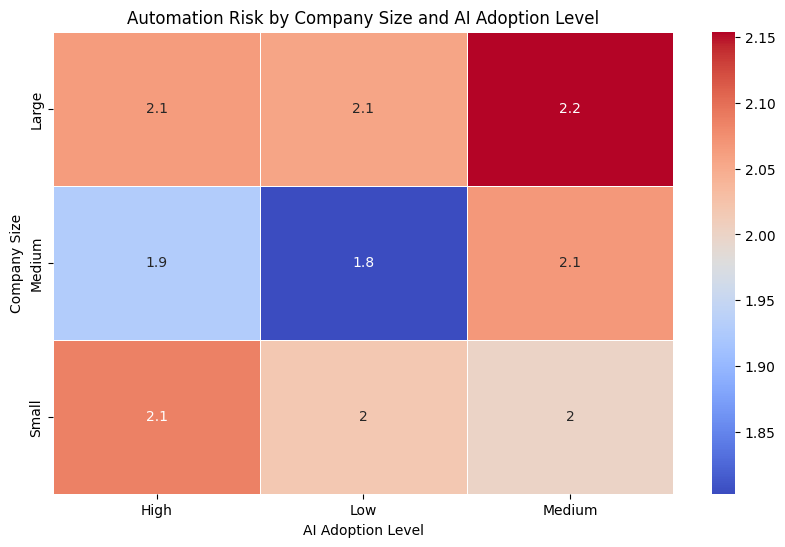

In [13]:
# Pivot the table for a heatmap
heatmap_data = df.pivot_table(index='Company_Size', columns='AI_Adoption_Level', values='Automation Risk Numeric')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Automation Risk by Company Size and AI Adoption Level')
plt.xlabel('AI Adoption Level')
plt.ylabel('Company Size')
plt.show()


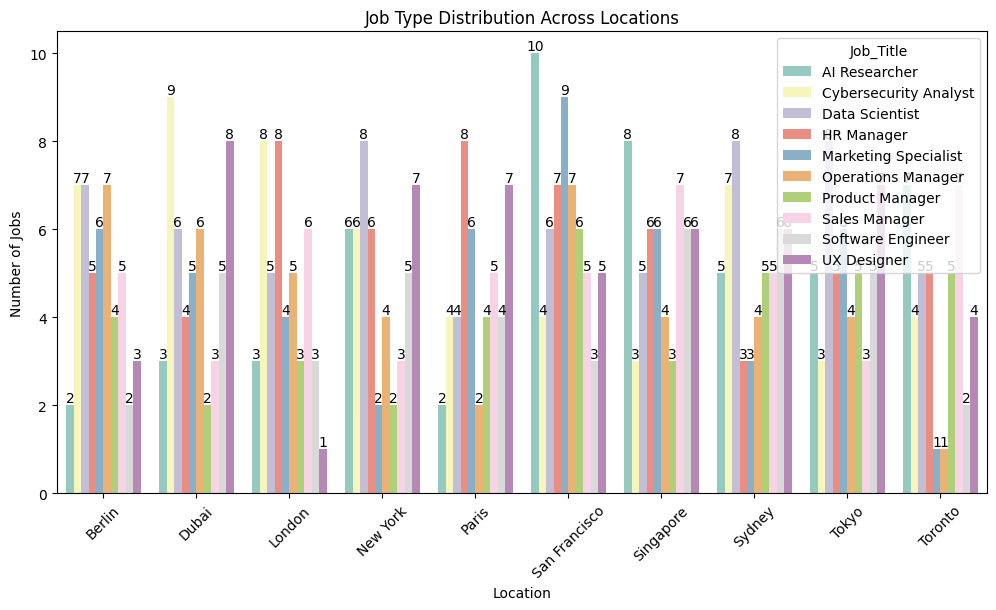

In [14]:


location_job_type = df.groupby(['Location', 'Job_Title']).size().reset_index(name='Counts')

# Create a bar plot to show distribution of job types across different locations
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Location', y='Counts', hue='Job_Title', data=location_job_type, palette='Set3')

# Add title and labels
plt.title('Job Type Distribution Across Locations')
plt.ylabel('Number of Jobs')
plt.xlabel('Location')

# Show the plot
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



In [15]:
df.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection,AI Adoption Level Numeric,Automation Risk Numeric
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392,Yes,Growth,2,3
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93793,No,Decline,2,3
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170,Yes,Growth,2,3
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93028,No,Growth,1,3
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87753,Yes,Decline,1,1


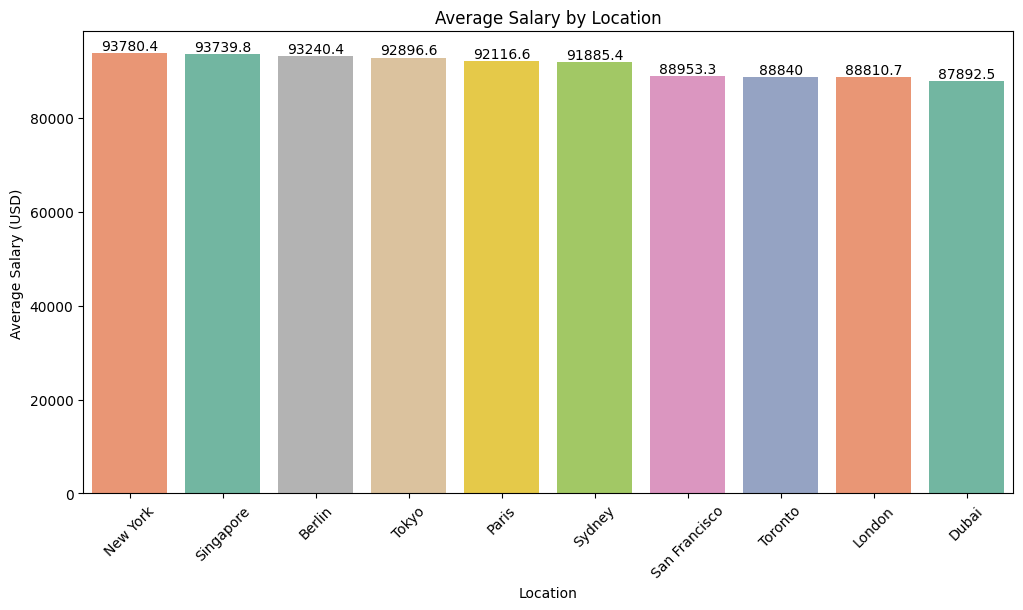

In [20]:

avg_salary_by_location = df.groupby('Location')['Salary_USD'].mean().reset_index()

avg_salary_by_location = avg_salary_by_location.sort_values(by='Salary_USD', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Location', y='Salary_USD', data=avg_salary_by_location,hue='Salary_USD', palette='Set2',legend=False)

plt.title('Average Salary by Location')
plt.xlabel('Location')
plt.ylabel('Average Salary (USD)')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)
plt.show()


C:\Users\Waseem Abbas\AppData\Local\Temp\ipykernel_5456\2897066076.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Salary_USD', data=df, palette='Set2',legend=False)


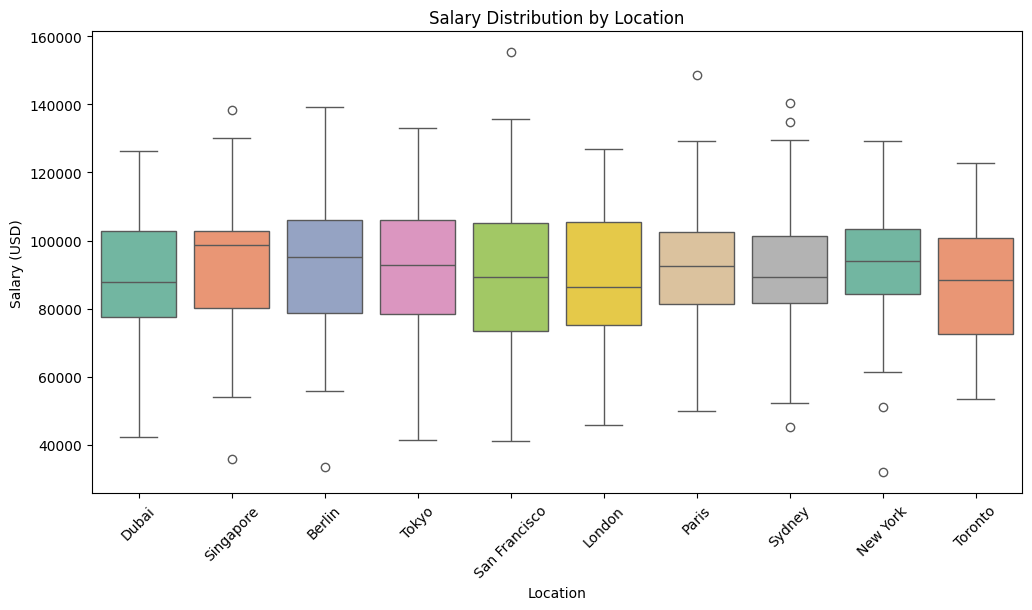

In [17]:
# Create a box plot to visualize salary distribution by location
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='Salary_USD', data=df, palette='Set2',legend=False)

# Add title and labels
plt.title('Salary Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Salary (USD)')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


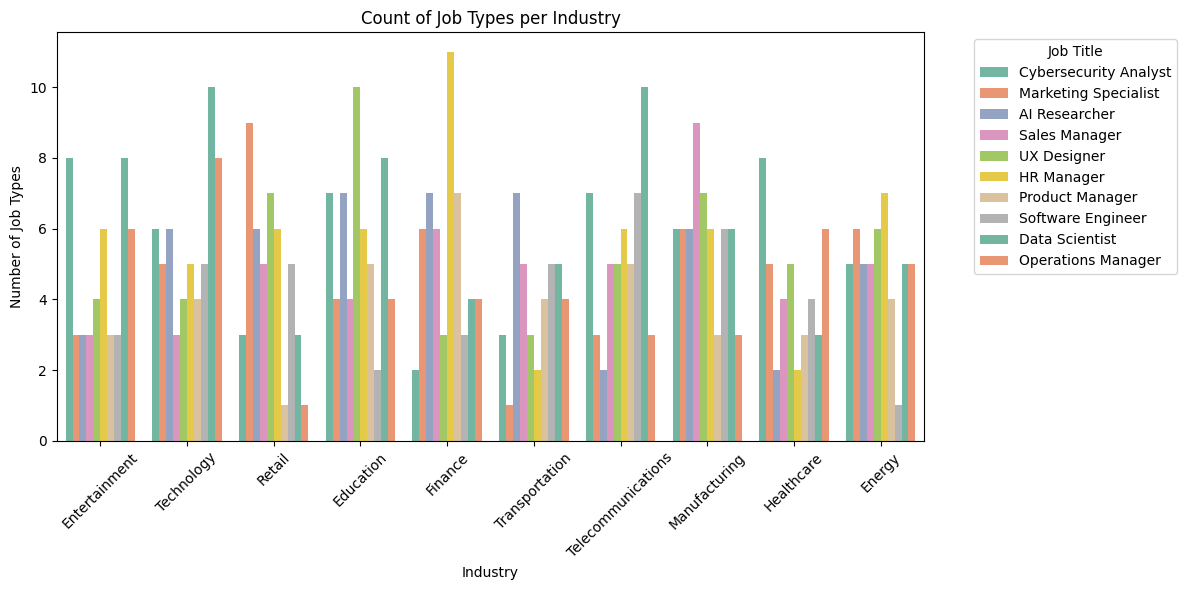

In [18]:
# Create a count plot for job types by industry
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Industry', hue='Job_Title', palette='Set2')

# Add title and labels
plt.title('Count of Job Types per Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Job Types')

# Show the legend for job titles
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


<Figure size 1000x600 with 0 Axes>

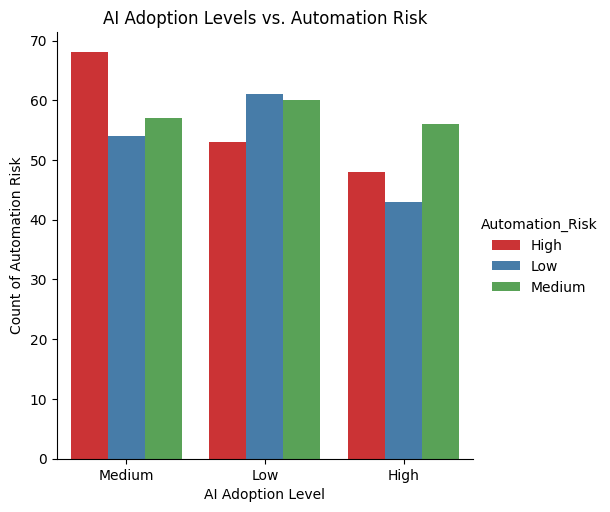

In [19]:
# Create a categorical plot for AI Adoption vs. Automation Risk
plt.figure(figsize=(10, 6))
ax = sns.catplot(data=df, x='AI_Adoption_Level', hue='Automation_Risk', kind='count', palette='Set1')
plt.title('AI Adoption Levels vs. Automation Risk')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count of Automation Risk')
plt.show()
